In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pylab import rcParams
%matplotlib inline


In [ ]:
x = np.linspace((-np.pi)*2, np.pi*2, 50, endpoint=True)

In [ ]:
y1, y2, y3 = np.sin(x), np.cos(x), np.tan(x)

plt.plot(x, y1, c='g', marker='s', label='sin(x)')
plt.plot(x, y2, c='r', marker='o', label='con(x)')
# plt.plot(x, y3, c='b', marker='x', label='tan(x)')

plt.legend(loc='upper left', numpoints=2,)

In [ ]:
plt.plot(x, y3, c='b', marker='x', label='tan(x)')

---


REF: https://github.com/avantcontra/coding-druid/blob/master/01-Math-Trig-Function/sine-python/01-math-sine-python.ipynb
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

MovieWriter imagemagick unavailable; using Pillow instead.


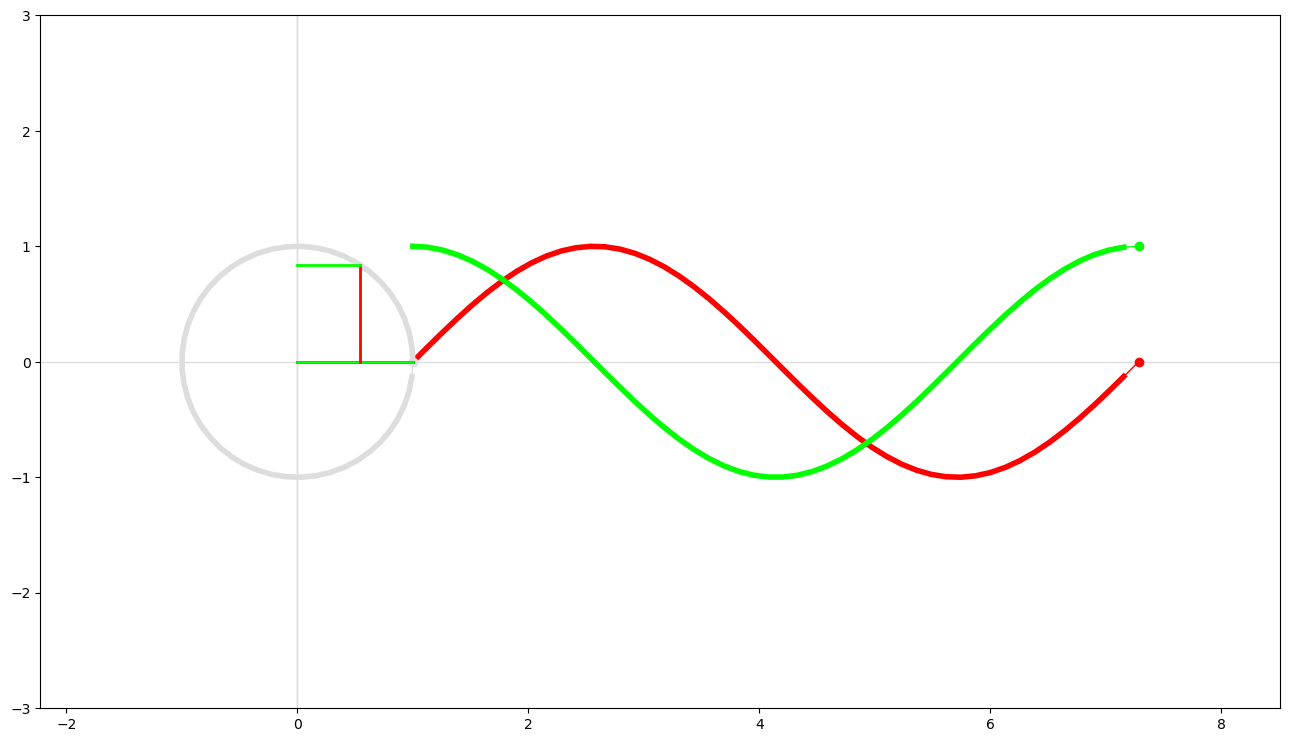

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pylab import rcParams

# CONSTANT 
NUM   = 50  # sample point number
INTV  = 1000 # animation display interval(ms)
R     = 1   # the unit circle radius 
LIMIT = R * 3 # Y axis limit
PI    = np.pi

LW    = 4   # linewidth for chart plot
lw    = 2   # support line width
DENS  = R * 10 # support line drawing density

# Chart Config
rcParams['figure.figsize'] = 16, 9

fig, ax = plt.subplots(1,1)
plt.axis('equal')
#polar = plt.subplot(111, projection='polar') # polar coodinator,not compatible

TAN_EN  = False # if display tan

# Color config:
SIN_CLR = '#ff0000'
COS_CLR = '#00ff00'
TAN_CLR = '#0000ff'
SUP_CLR = '#dddddd' # grey
BLK_CLR = '#000000' # grey
RAD_CLR = '#111111'


# set x/y limit
ax.set_xlim([0, 2*PI])
ax.set_ylim([-1*LIMIT, 1*LIMIT])

# a, y range
x     = np.linspace(0, 2*PI, NUM)    # radian
theta = np.arange(  0, 2*PI, 0.02)   # degree

# triangle function
sy = R* np.sin(x)
cy = R* np.cos(x)
ty = R* np.tan(x)

# x axis path
ax.plot(3*x-3, 0*sy,     linewidth=1, color=SUP_CLR)  
# y axis path
ax.plot(0*x,   LIMIT*sy, linewidth=1, color=SUP_CLR)

# unit circle path
ax.plot(cy, sy, linewidth=1, color = SUP_CLR)

x_shift = x + R # right shift UINT for sin/cosin/tan plot

# sine path
ax.plot(x_shift, sy, linewidth=1, color = SIN_CLR) 

# cosin path
ax.plot(x_shift, cy, linewidth=1, color = COS_CLR)

# tan path 
if TAN_EN:
    ax.plot(x_shift, ty, linewidth=1, color = TAN_CLR) 


def get_anim_obj(ax, line_width, color):
    line_obj, = ax.plot([], [], linewidth=line_width, color=color)
    dot_obj , = ax.plot([], [], 'o', color=color)
    return line_obj, dot_obj


# support line coordinate calc
# def rline(rad):
#     rx, ry = [], []
#     s = R / DENS
#     r = 0
#     for i in range(DENS+1):
#         rx.append(r * np.cos(rad))
#         ry.append(r * np.sin(rad))
#         r += s
#     return rx, ry
        

def hline(rad, in_circle = True ):
    rx, ry = [], []
    s = R / DENS
    r = 0
    for i in range(DENS+1):
        rx.append(R * np.cos(rad)) #if in_circle else pass #rx.append(R * np.cos(rad)) 
        ry.append(r * np.sin(rad))
        r += s
    return rx, ry    
    
    
def bline(rad, in_circle = True):
    rx, ry = [], []
    s = R / DENS
    r = 0
    for i in range(DENS+1):
        rx.append(r * np.cos(rad))
        ry.append(R * np.sin(rad)) #if in_circle else pass #rx.append(R * np.sin(rad)) 
        r += s
    return rx, ry    


def rline(rad):
    rx, _ = bline(rad)
    _, ry = hline(rad)
    return rx, ry
    
##############################

# ------ anim color/width setup-------
sineLine, sineDot = get_anim_obj(ax, LW, SIN_CLR)
cosLine,  cosDot  = get_anim_obj(ax, LW, COS_CLR)
tanLine,  tanDot  = get_anim_obj(ax, LW, TAN_CLR)
circleLine, circleDot = get_anim_obj(ax, LW, SUP_CLR)

rLine, _ = get_anim_obj(ax, lw, RAD_CLR)
hLine, _ = get_anim_obj(ax, lw, SIN_CLR)
bLine, _ = get_anim_obj(ax, lw, COS_CLR)

hLine_sin, _ = get_anim_obj(ax, lw, SIN_CLR)
bLine_cos, _ = get_anim_obj(ax, lw, COS_CLR)


def Anim(i):
    
    # sine anim
    sineLine.set_data(x_shift[:i], sy[:i])
    sineDot.set_data (x_shift[i] , sy[i])
    
    # cos anim
    cosLine.set_data (x_shift[:i], cy[:i])
    cosDot.set_data  (x_shift[i] , cy[i])
    
    # tan anim
    if TAN_EN:
        tanLine.set_data (x_shift[:i], ty[:i])
        tanDot.set_data  (x_shift[i] , ty[i])    
    
    # circle anim
    circleLine.set_data(cy[:i], sy[:i])
    circleDot.set_data (cy[i],  sy[i])
    
    # support lines anim
    rLine.set_data  (rline(x[i]))
    hLine.set_data  (hline(x[i]))
    bLine.set_data  (bline(x[i]))
    
#     hLine_sin.set_data (hline(x_shift[i], in_circle= False))
#     bLine_cos.set_data (bline(x_shift[i], in_circle= False))

anim = animation.FuncAnimation(fig, Anim, frames=len(x), interval=INTV)
# -------------

# anim.save('triangle-py-effect.mp4', writer='ffmpeg')
anim.save('triangle-py-effect.gif', fps=30, writer='imagemagick')

In [10]:
3*x-3

array([-3.        , -2.61531519, -2.23063037, -1.84594556, -1.46126074,
       -1.07657593, -0.69189111, -0.3072063 ,  0.07747852,  0.46216333,
        0.84684815,  1.23153296,  1.61621778,  2.00090259,  2.38558741,
        2.77027222,  3.15495704,  3.53964185,  3.92432667,  4.30901148,
        4.69369629,  5.07838111,  5.46306592,  5.84775074,  6.23243555,
        6.61712037,  7.00180518,  7.38649   ,  7.77117481,  8.15585963,
        8.54054444,  8.92522926,  9.30991407,  9.69459889, 10.0792837 ,
       10.46396852, 10.84865333, 11.23333814, 11.61802296, 12.00270777,
       12.38739259, 12.7720774 , 13.15676222, 13.54144703, 13.92613185,
       14.31081666, 14.69550148, 15.08018629, 15.46487111, 15.84955592])

In [ ]:
theta=np.arange(0,2*np.pi,0.02)
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122)
ax1.plot(theta,theta/6,'--',lw=2)
ax2.plot(theta,theta/6,'--',lw=2)
plt.show()